# Predicting Financial Inclusion In East Africa


### a) Specifying the Data Analytic Question

> The research question is to figure out how we can predict which individuals are most likely to have or use a bank account. The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success
> Being able to predict which individuals are most likely to have or use a bank account as this will help provide an indication of the state of financial inclusion in East Africa.

### c) Understanding the context

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

> The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes

### d) Recording the Experimental Design

> Reading the datasets into our environment.
Tidying the data by checking for outliers, null values and duplicates and dealing with them.
Performing univariate, bivariate and multivariate analysis and recording the observations.
Implementing the solution by performing the respective analysis i.e. principal component analysis and discriminant analysis.
Challenge your solution by providing insights on how you can make improvements.

### e) Data Relevance

> The data we have is relevant since we need key demographic factors such as age, income, household size, gender, marital status, type of job and level of education to provide an indication of the state of financial inclusion in the respective countries.

Dataset

> The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018. Dataset Files:

> Variable Definitions: http://bit.ly/VariableDefinitions (Links to an external site.)

> Dataset: http://bit.ly/FinancialDataset (Links to an external site.)

## Work Plan
This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model

# IMPORTING LIBRARIES

In [ ]:
# Libraries for working with the dataframe and plotting

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical libraries
from statistics import median
from statistics import mean


# Libraries for machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Using git to save the datasets
url1 = 'https://raw.githubusercontent.com/Mwangi-Gichuki/Financial_Inclusion/main/Test.csv'
url2 = 'https://raw.githubusercontent.com/Mwangi-Gichuki/Financial_Inclusion/main/Train.csv'
url3 = 'https://raw.githubusercontent.com/Mwangi-Gichuki/Financial_Inclusion/main/VariableDefinitions.csv'
url4 = 'https://raw.githubusercontent.com/Mwangi-Gichuki/Financial_Inclusion/main/TrainDirty.csv'

# Loading the data into pandas dataframes
test = pd.read_csv(url1)
train = pd.read_csv(url2)
variables = pd.read_csv(url3)

# Initial Data Provided is clean so I created a dirty version (traindirty)to enable perfom parts of the assignment

dirty = pd.read_csv(url4)


## Understanding the Dataset

In [ ]:
# Observing the shape of the test and train datasets
print('test data shape :', test.shape)
print('train data shape :', train.shape)

test data shape : (10086, 12)
train data shape : (23524, 13)


The train dataset has 23,524 rows and 13 columns while the test dataset has 10,086 rows and 12 columns. Further exploration to understand the train dataset as it will be used for coming up with the ML model

In [ ]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [ ]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


#### Using the Dirty Dataset for Data Cleaning

Data cleaning steps:


1.   Checking for null values
2.   Checking number of unique values
3.   Checking for outliers

Creating a function to clean the data



In [ ]:
def is_dataset_clean(dataset):
    """
    Checks if a dataset is clean by looking for null values and outliers.

    Args:
        dataset: A Pandas DataFrame object representing the dataset.

    Returns:
        A boolean value indicating whether the dataset is clean or not.
    """

    # Check for missing values
    if dataset.isnull().sum().sum() > 0:
        return False

    # Check for outliers
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3 - q1
    outliers = ((dataset < (q1 - 1.5 * iqr)) | (dataset > (q3 + 1.5 * iqr))).sum().sum()
    if outliers > 0:
        return False

    # If all checks pass, return True
    return True
# This function first checks for null values in the dataset by calling the isnull() and sum()
# methods of the DataFrame object, and returns False if any null values are found.

# Then, the function checks for outliers by calculating the interquartile range (IQR) of
# each column using the quantile() method, and then identifying any values outside of 1.5
# times the IQR using boolean indexing. The total number of outliers is then calculated using the sum() method,
# and the function returns False if any outliers are found.

# If no null values or outliers are found, the function returns True, indicating that the dataset is clean.


is_dataset_clean(dirty)



False

In [ ]:
# Checking for null values
dirty.isnull().sum()

country                   2
year                      0
uniqueid                  1
bank_account              1
location_type             1
cellphone_access          0
household_size            2
age_of_respondent         1
gender_of_respondent      5
relationship_with_head    2
marital_status            3
education_level           2
job_type                  6
dtype: int64

Checks for data cleanliness shows there are several null values in the following columns:


1.   country                   2
2.   uniqueid                  1
3.   bank_account              1
4.   location_type             1
5.   household_size            2
6.   age_of_respondent         1
7.   gender_of_respondent      5
8.   relationship_with_head    2
9.   marital_status            3
10.  education_level           2
11.  job_type                  6        

Since the number of null values per column is not high and therefore not likely to affect the analysis, we shall drop all null values


In [ ]:
# Deleting the null values using dropna()
dirty = dirty.dropna()

In [ ]:
dirty.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           94
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

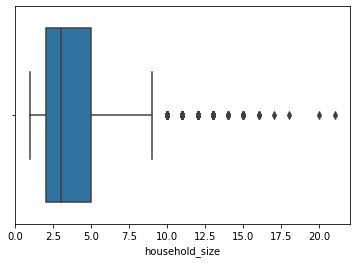

In [ ]:
# Checking for Outliers in the Household size and age of respondent columns

sns.boxplot(dirty['household_size'])



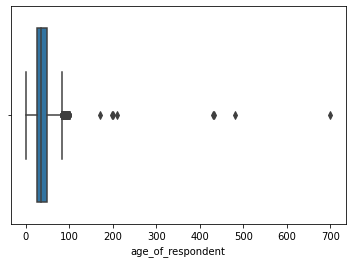

In [ ]:
sns.boxplot(dirty['age_of_respondent'])

Using boxplots to detect outliers shows outliers in the age_of_respondent column and household_size columns. Business understanding of the data allows us to conclude the oultliers in the household_size are acceptable as they fall within a range that is realistic in the region of study. However, the outliers in the age_of_respondent column are beyond the reasonable age for human being, we shall check for all those that are above 100 years and determine what to do with the outliers

In [ ]:
print(np.where(dirty['age_of_respondent']>100))

(array([  229,   256,   279,   427, 22926, 22962, 22997, 23107]),)


In [ ]:
# Replacing the outliers in the age_of_respondent column with the median value for the column

dirty["age_of_respondent"] = np.where(dirty["age_of_respondent"] >100, mean,dirty['age_of_respondent'])


In [ ]:
# Checking if our data is now clean

is_dataset_clean(dirty)

# Dataset can not be clean based on the parameters provided since age has outliers

False

## External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

## Tidying the Dataset

> Back to using the train dataset, doing data preparation for use in the analysis



In [ ]:
# Checking whether each column has an appropriate datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Exploratory Data Analysis(EDA)

### Univariate Analysis

Text(0.5, 1.0, 'population per country')

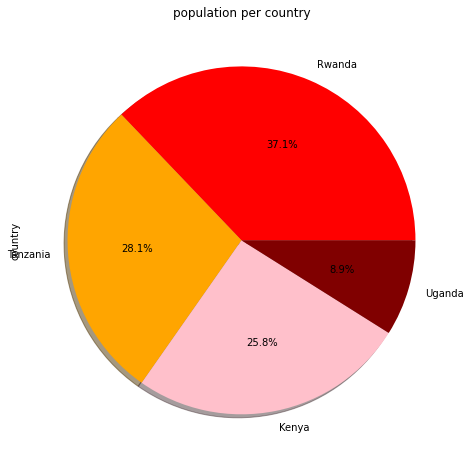

In [ ]:
# Pie chart the percentage number of surveyed population per country
# Visualizing the frequency table in a piechart

fig = plt.figure(figsize=(20,8))

colors = ['red', 'orange', 'pink', 'maroon']
train['country'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('population per country')

Observations
**bold text**
The output shows that the Rwanda had the highest number of individuals interviewed while Uganda had the lowest number.

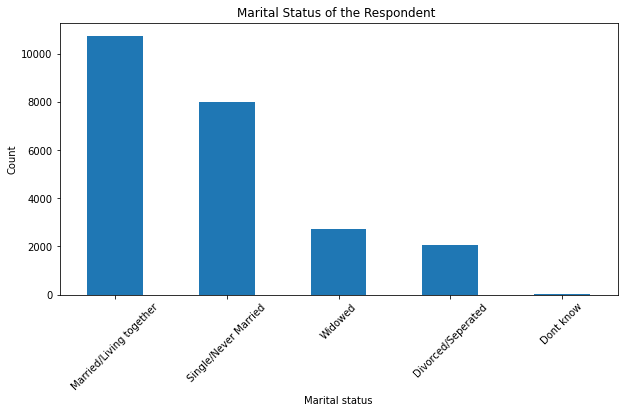

In [ ]:

# Bar chart for 'marital status' variable

train['marital_status'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Marital Status of the Respondent ")
plt.xticks(rotation = 45)
plt.show()

**Observation**

The number of married people living together is higher than the seperated

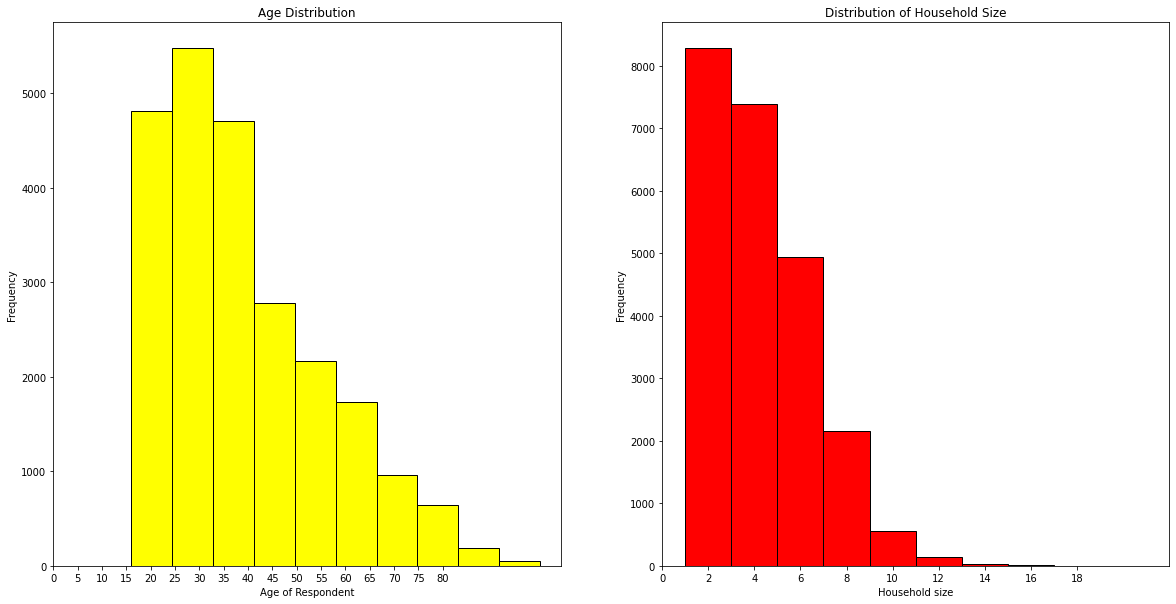

In [ ]:
# Next, we can plot a histogram to show the distribution of
# age and household size in the dataset
fig,ax=plt.subplots(1,2,figsize=(20,10))
train['age_of_respondent'].plot.hist(ax=ax[0],bins=10,edgecolor='black',color='yellow')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age of Respondent')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train['household_size'].plot.hist(ax=ax[1],color='red',bins=10,edgecolor='black')
ax[1].set_title('Distribution of Household Size')
ax[1].set_xlabel('Household size')
x2=list(range(0,20,2))
ax[1].set_xticks(x2)
plt.show()

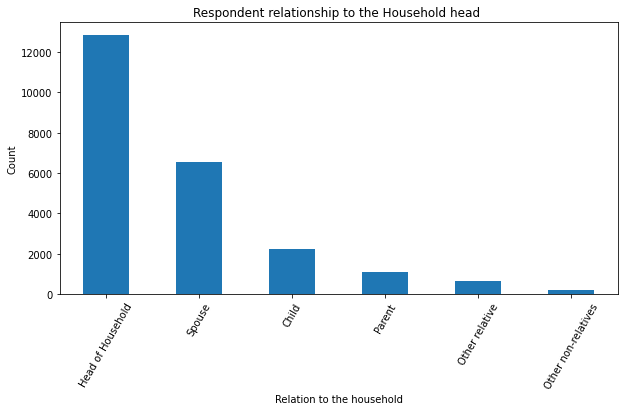

In [ ]:

# Bar chart for 'relationship_with_head' variable

train['relationship_with_head'].value_counts().plot.bar(figsize=(10,5))
plt.xlabel("Relation to the household")
plt.ylabel("Count")
plt.title("Respondent relationship to the Household head ")
plt.xticks(rotation = 60)
plt.show()

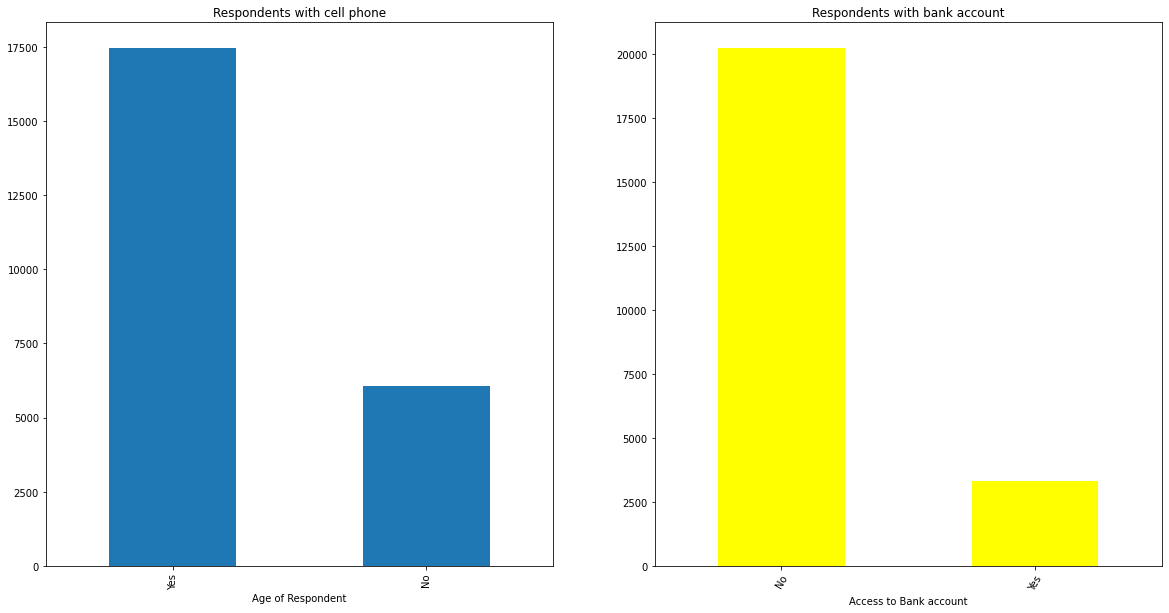

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
train['cellphone_access'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Respondents with cell phone')
ax[0].set_xlabel('Age of Respondent')
train['bank_account'].value_counts().plot.bar(ax=ax[1], color='yellow')
ax[1].set_title('Respondents with bank account')
ax[1].set_xlabel('Access to Bank account')
plt.xticks(rotation = 60)
plt.show()

**Observation**

The number of respodents with phones is higher than those without

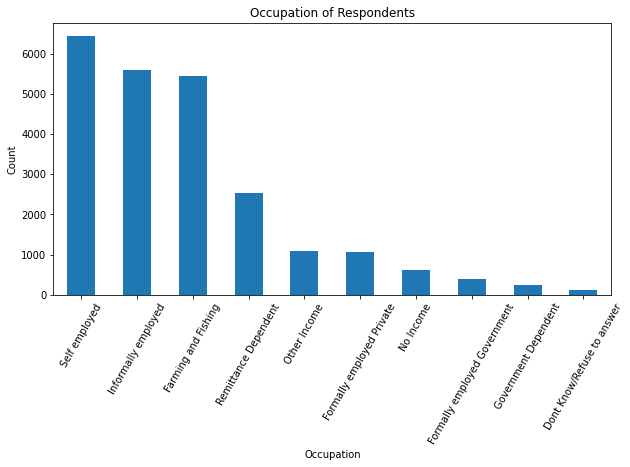

In [ ]:
# Bar chart for 'occupation' variable

train['job_type'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation of Respondents")
plt.xticks(rotation = 60)
plt.show()

**Observation**


*  Most people are self employed



**Bivariate Analysis**

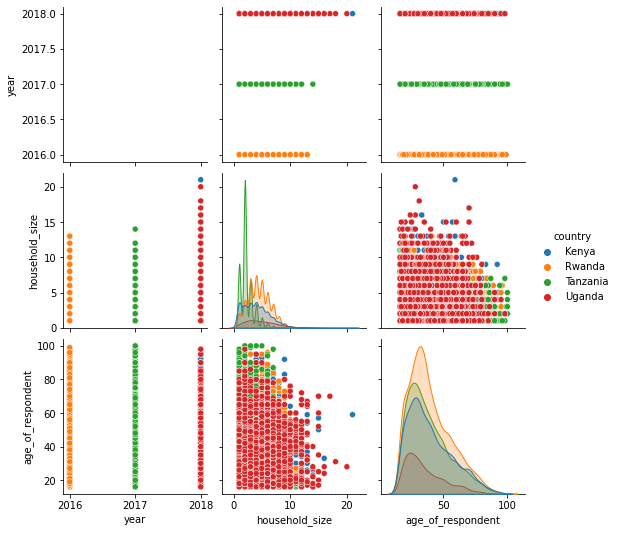

In [ ]:
# We will now plot the bivariate summaries of our numerical data and record our observations per country
#
sns.pairplot(train, hue='country')
plt.show()


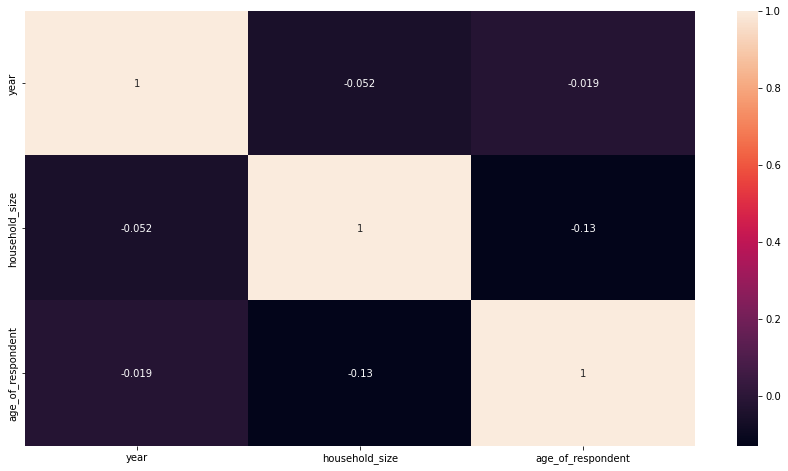

In [ ]:
# Plotting the Pearson correlation coefficient among the numeric variables in our dataset

fig = plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(),annot=True)
plt.show()

**Observations**

The three variables are not strongly correlated since all the correlation coefficeints are close to 0.

Comparing the various categorical variables with each other

In [ ]:
#Relationship between gender, location and access to bank account

pd.crosstab([train.bank_account, train.gender_of_respondent]
            ,train.location_type, margins=True).style.background_gradient(cmap='Pastel1_r')


**Observations**

From the output, more men have bank accounts compared to women. We also see that men living in rural areas have more accounts than those living in urban areas while women living in urban areas have more bank accounts compared to those living in rural areas.

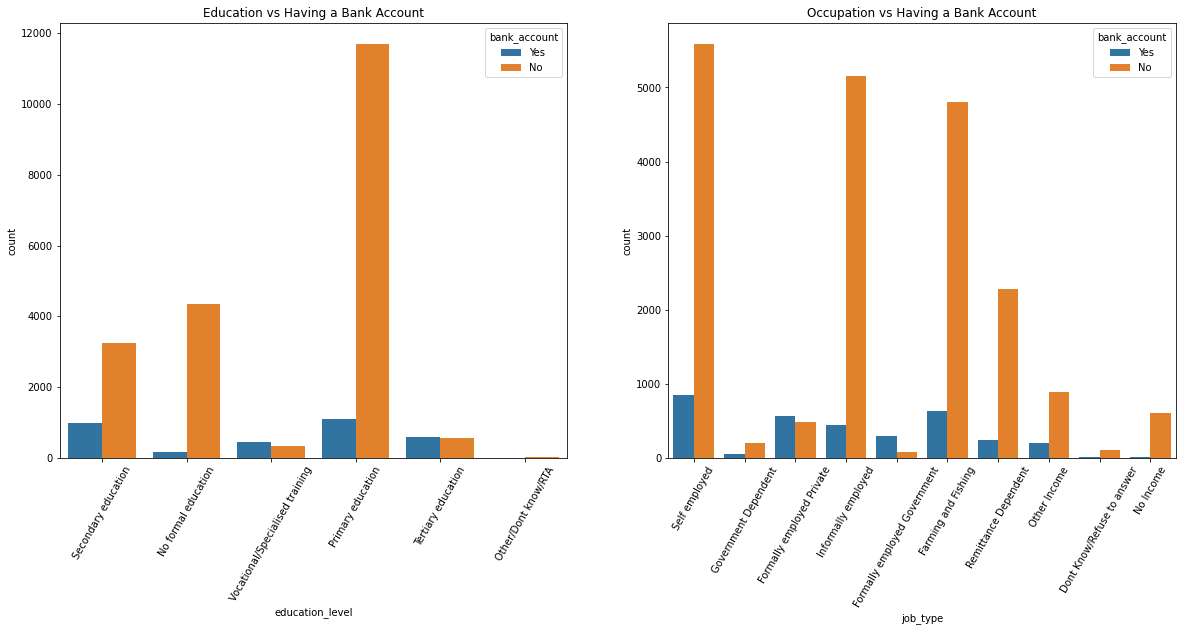

In [ ]:
# Checking if the level of education and the job type influences having a bank account

fig,ax=plt.subplots(1,2,figsize=(20,8))

sns.countplot('education_level',hue='bank_account',data=train,ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')


sns.countplot('job_type',hue='bank_account',data=train,ax=ax[1])
ax[1].set_title('Occupation vs Having a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.show()


**Observations**

The highest number of individuals sample went upto Primary education level and majority of the population with bank accounts are self employed.

In [ ]:
# We need to change some categorical attributes to numeric
# so that we can get a summary of all correlations
# to whether a person has a bank account or not

encode = {"bank_account": {"Yes":1, "No":0}, "gender_of_respondent": {"Male":1, "Female":0},
          "cellphone_access":{"Yes":1,"No":0}, "location_type": {"Rural":1, "Urban":0},
          "education_level":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "relationship_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5},
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}


In [ ]:
train1 = train.replace(encode, inplace = False)
train1.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,1,1,3,24,0,3,0,2,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5,70,0,0,3,0,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5,26,1,4,1,3,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5,34,0,0,0,1,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8,26,1,1,1,1,Informally employed


In [ ]:
test1 = test.replace(encode, inplace = False)
test1.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,0,1,3,30,1,0,0,2,Formally employed Government
1,Kenya,2018,uniqueid_6060,0,1,7,51,1,0,0,3,Formally employed Private
2,Kenya,2018,uniqueid_6065,1,0,3,77,0,2,0,0,Remittance Dependent
3,Kenya,2018,uniqueid_6072,1,0,6,39,0,0,0,1,Remittance Dependent
4,Kenya,2018,uniqueid_6073,0,0,3,16,1,1,1,2,Remittance Dependent


In [ ]:

# From the encoded data, we can now find the correlation between the different variables
# and access to bank account status

print(train1['household_size'].corr(train1['bank_account']))
print(train1['location_type'].corr(train1['bank_account']))
print(train1['gender_of_respondent'].corr(train1['bank_account']))
print(train1['cellphone_access'].corr(train1['bank_account']))

-0.028326471628604428
-0.08728829079224291
0.11723388834661755
0.2096687653474873


**Implementing the Solution**

Here, we are going to use Principal Component Analysis (PCA) to select the most important features in the dataset that tell us the maximum amount of information about the dataset

In [ ]:

# We will start by preprocessing i.e by dividing our dataset into a feature set and corresponding labels
# Will assign the feature sets the variable avand the series of corresponding labels the variable b

a = train1.drop('bank_account',1)
b = train1['bank_account']


In [ ]:
# We then split the dataset into Training set and Test set
# we shall define the size of the test data as 20% of entire dataset

from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

In [ ]:
# We will perform standard scalar normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)


In [ ]:

# Now we will apply PCA

# The expectation is to return all the features in the feature set for both the training and test sets
# since the number of components in the constructor will not be specified

from sklearn.decomposition import PCA

pca = PCA()
a_train = pca.fit_transform(a_train)
a_test = pca.transform(a_test)

In [ ]:

# Explained Variance Ratio

# Checking the variance caused by the principal components using
# the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.23089582, 0.18838749, 0.16739239, 0.11620202, 0.09419517,
       0.08248313, 0.07309964, 0.04734434])

Observations

The output shows that the first principal component is responsible for 23.08% variance and the second principal component causes 18.83% variance in the dataset. We can therefore say that 41.91% (23.08 + 18.83) of the classification information contained in the feature set is captured by the first two principal components.

In [ ]:
# Using 1 Principal Component to train algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
a_train = pca.fit_transform(a_train)
a_test = pca.transform(a_test)

In [ ]:
# Training and Making Predictions using random forest classification

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a_train, b_train)

# Predicting the Test set results
b_pred = classifier.predict(a_test)


In [ ]:

# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy' , accuracy_score(b_test, b_pred))


[[4005    0]
 [ 700    0]]
Accuracy 0.8512221041445271


Observations

The random forest algorithm is able to correctly predict a 85.12% accuracy with only one feature.

In [ ]:

# Using 2 Principal Components to train algorithm
# and make predictions using random forest classification

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

pca = PCA(n_components=2)
a_train = pca.fit_transform(a_train)
a_test = pca.transform(a_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(a_train, b_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy' , accuracy_score(b_test, b_pred))

[[4005    0]
 [ 700    0]]
Accuracy 0.8512221041445271


Observations

With two features, the random forest algorithm is able to correctly predict an 85.12% accuracy.


## Follow up questions
> How does other finchech products like mobile banking and mobile money tranbsfer contribute to Finacial Inclusivity in East Africa?

### a). Did we have the right data?
> Yes.
> Because we were able to detemine the number of people who have access to the bank within the rural and the urban areas. We were also able to consider other factors like job type, level of education,location type and other factors.

### b). Do we need other data to answer our question?

> Yes.

> We need data on other fintech products like mobile banking,mobile money transfer and other products that are highly encouraged to ensure financial inclusion in East Africa.

### c). Did we have the right question?

> Yes we had the right question since the factors such as age, marital status, type of location, type of job and the level of education help drive the financial outcome of an individual. This will determanine whether one will have a bank account or not.